In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('../dataset/diagnosed_cbc_data_v4.csv')
print(df.head())
print(df.info())

    WBC  LYMp  NEUTp  LYMn  NEUTn   RBC  HGB    HCT   MCV   MCH  MCHC    PLT  \
0  10.0  43.2   50.1   4.3    5.0  2.77  7.3   24.2  87.7  26.3  30.1  189.0   
1  10.0  42.4   52.3   4.2    5.3  2.84  7.3   25.0  88.2  25.7  20.2  180.0   
2   7.2  30.7   60.7   2.2    4.4  3.97  9.0   30.5  77.0  22.6  29.5  148.0   
3   6.0  30.2   63.5   1.8    3.8  4.22  3.8   32.8  77.9  23.2  29.8  143.0   
4   4.2  39.1   53.7   1.6    2.3  3.93  0.4  316.0  80.6  23.9  29.7  236.0   

    PDW   PCT                      Diagnosis  
0  12.5  0.17  Normocytic hypochromic anemia  
1  12.5  0.16  Normocytic hypochromic anemia  
2  14.3  0.14         Iron deficiency anemia  
3  11.3  0.12         Iron deficiency anemia  
4  12.8  0.22  Normocytic hypochromic anemia  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp 

In [11]:
#création du dataset sans LYMp, NEUTp, LYMn, NEUTn, HCT et PCT
#plus sans les étiquettes dans diagnosis : Other microcytic anemia, Leukemia, Leukemia with thrombocytopenia, Macrocytic anemia
def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64']).columns
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1

    # Suppression des outliers au-dessus du 3e quartile
    df_no_outliers = df[~((df[numeric_columns] > (Q3 + 1.5 * IQR)).any(axis=1))]

    return df_no_outliers

df_2 = df.drop(['LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'HCT', 'PCT'], axis=1)
df_2 = df_2[df_2.Diagnosis != 'Other microcytic anemia']
df_2 = df_2[df_2.Diagnosis != 'Leukemia']
df_2 = df_2[df_2.Diagnosis != 'Leukemia with thrombocytopenia']
df_2 = df_2[df_2.Diagnosis != 'Macrocytic anemia']

#suppression des outliers
df2 = remove_outliers(df_2)

#sauvegarde du dataset
df2.to_csv('../dataset/diagnosed_cbc_data_v1.csv', index=False)

#print nombre de lignes
print(df2.shape[0])

969


# Identification des valeurs manquantes

In [8]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne:\n", missing_values)

Valeurs manquantes par colonne:
 WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64


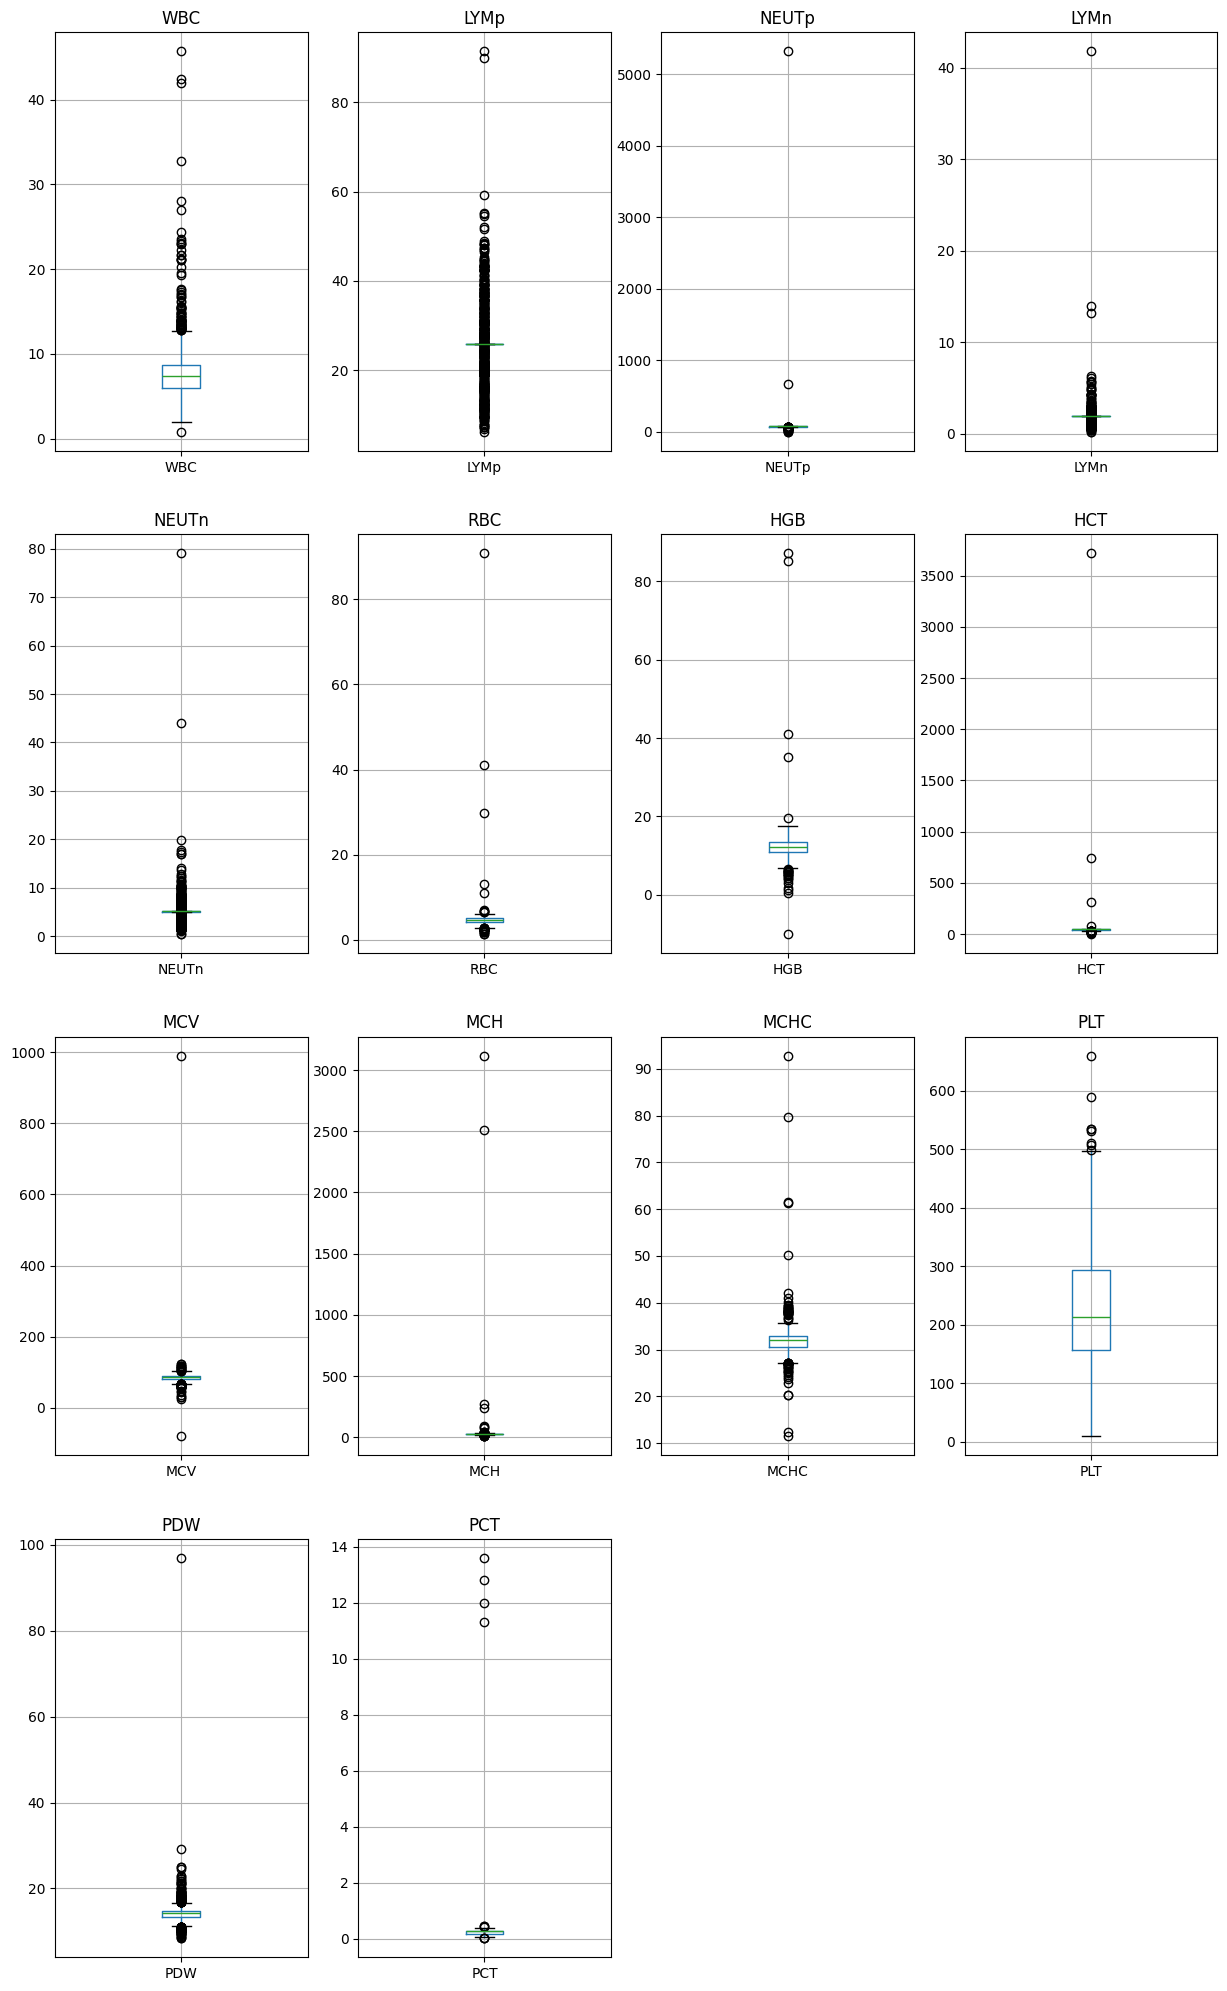

In [18]:

numeric_columns = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(15, 25))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    df.boxplot(column=column)
    plt.title(column)

## suppression des valeurs aberrantes

In [9]:
def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64']).columns
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1

    # Suppression des outliers au-dessus du 3e quartile
    df_no_outliers = df[~((df[numeric_columns] > (Q3 + 1.5 * IQR)).any(axis=1))]

    return df_no_outliers

## visualisation des boxplot

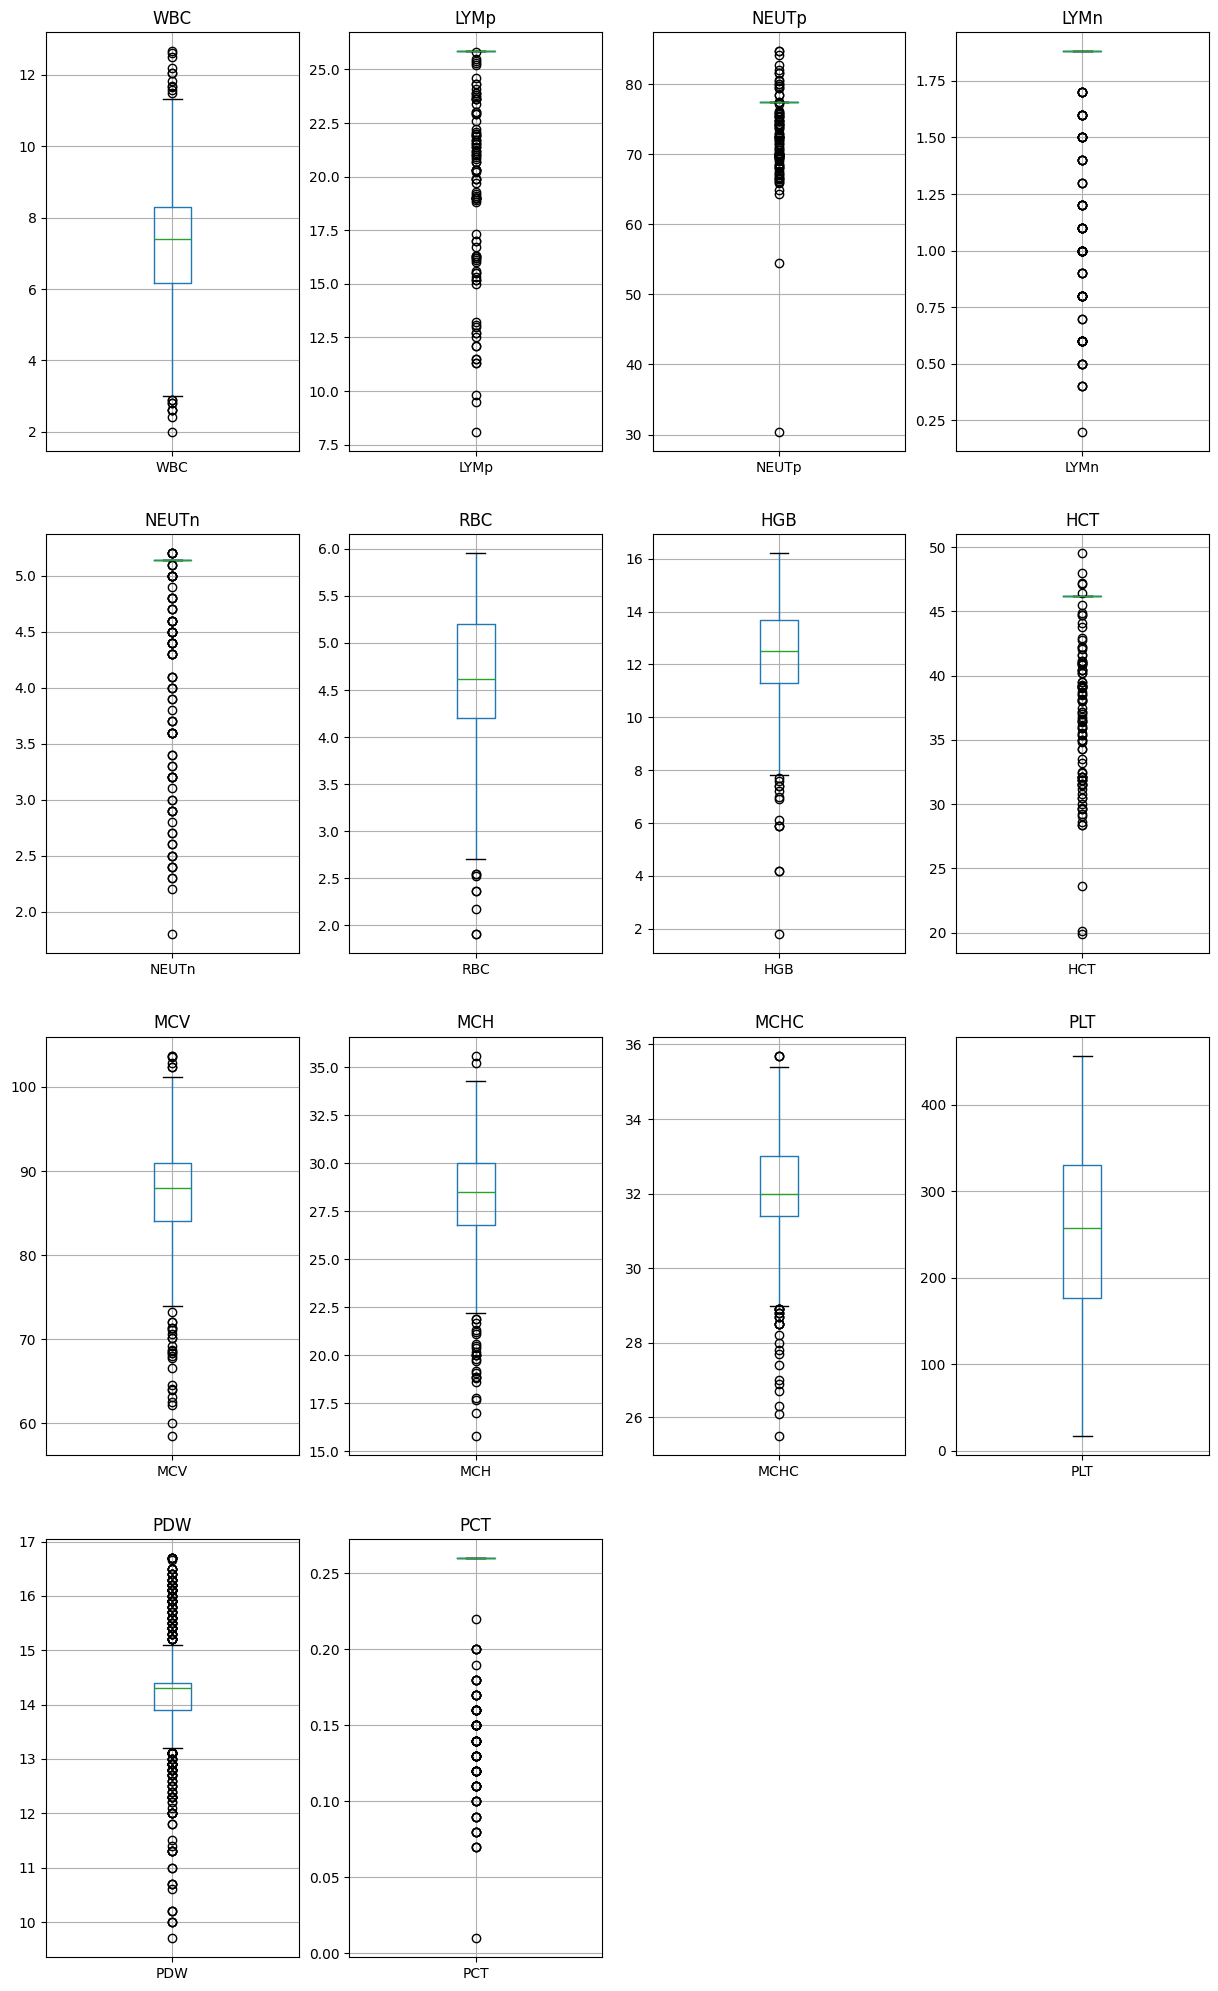

In [26]:
numeric_columns = df_no_outliers.select_dtypes(include=['float64']).columns
plt.figure(figsize=(15, 25))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    df_no_outliers.boxplot(column=column)
    plt.title(column)

## Analyse des boxplot

On voit clairement que les colonnes LYMp, NEUTp, LYMn, NEUTn, HCT, PCT sont des colonnes qui vont etre difficilement exploitables au vu de la repartition des valeurs.

On va essayer de normaliser les donnée avant de faire ca.

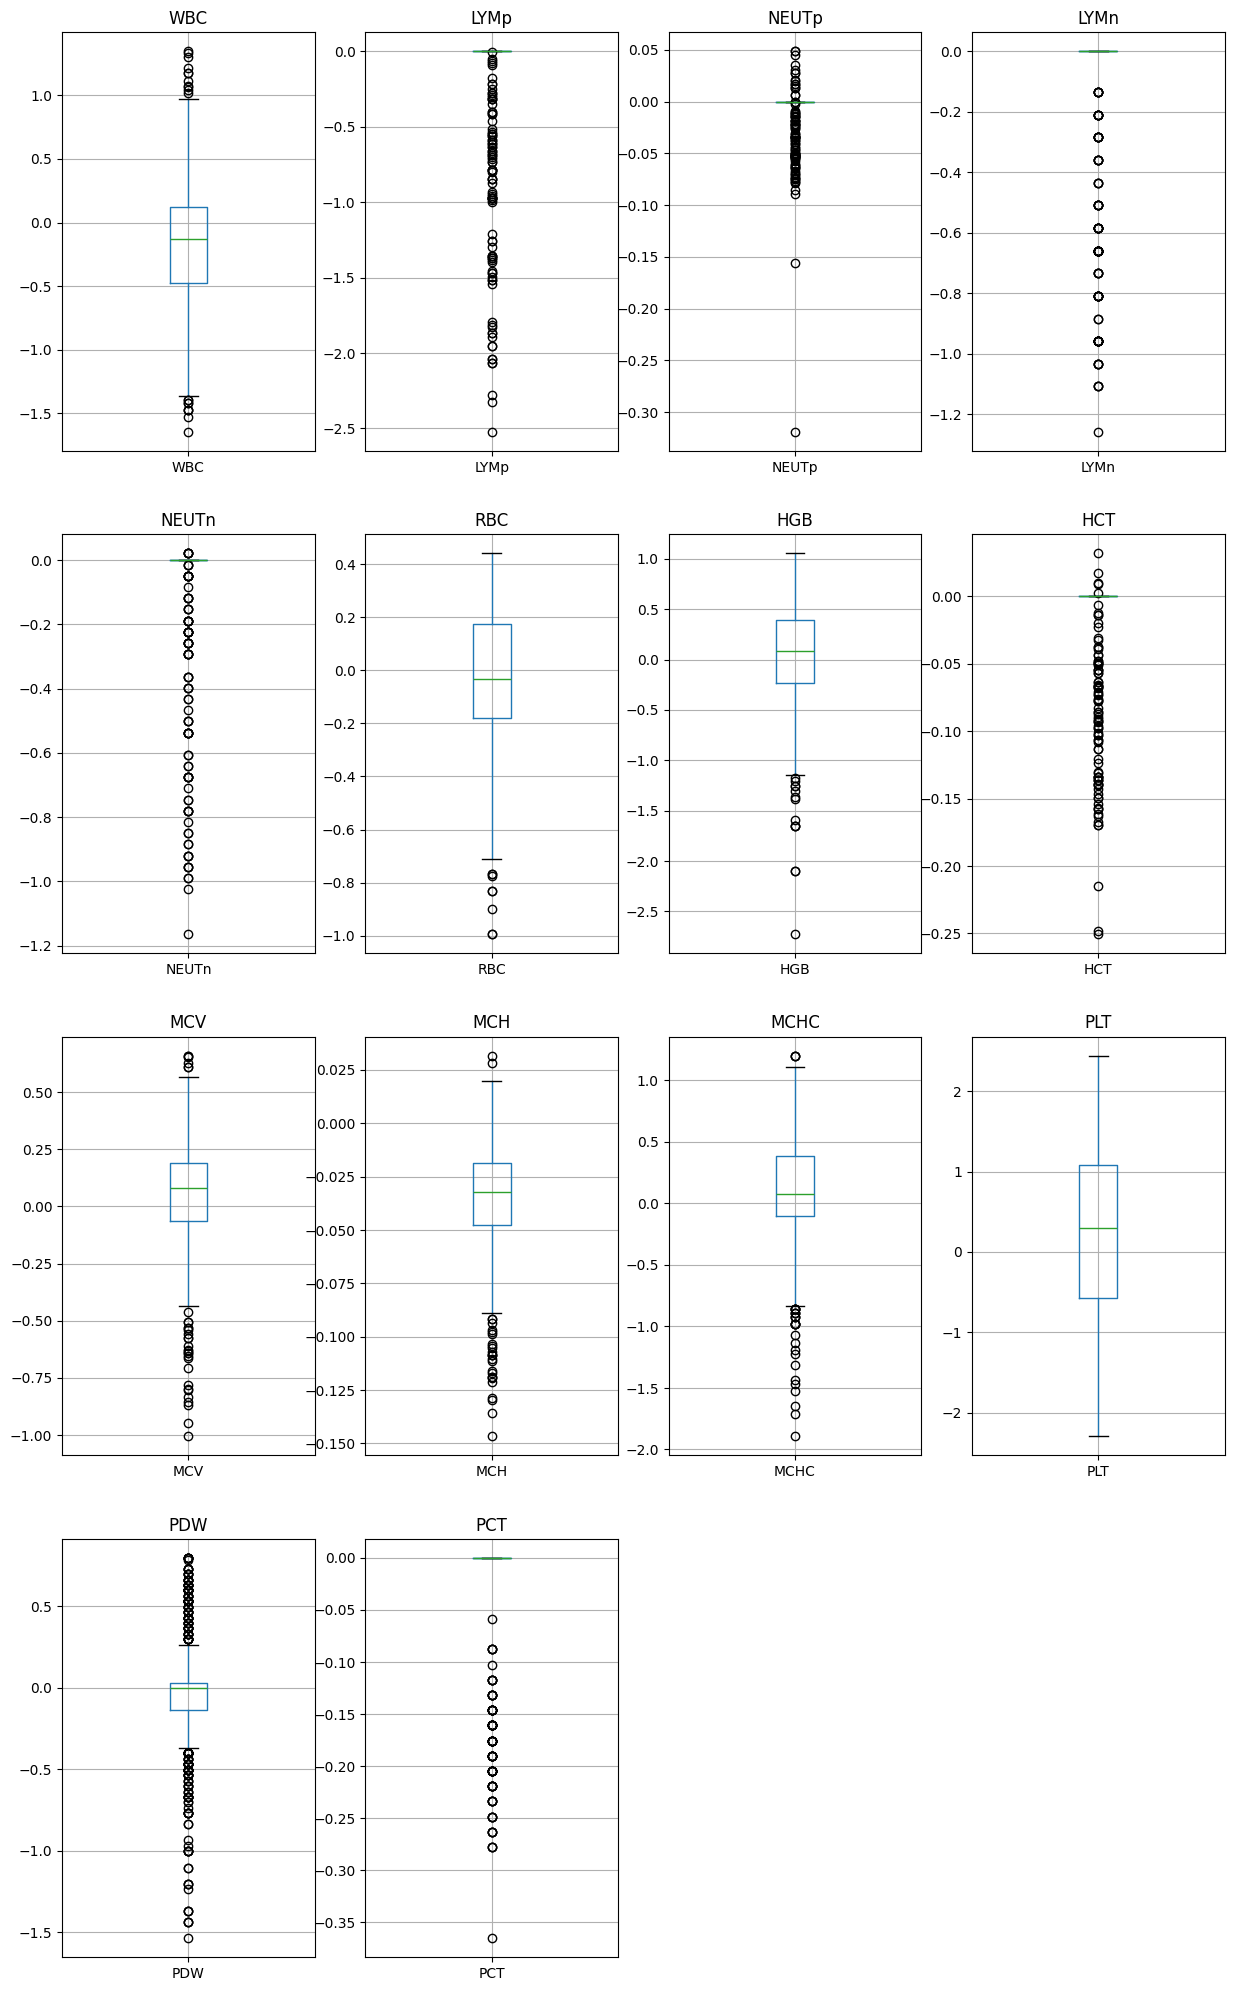

In [47]:
def normalize_data(df):
    numeric_columns = df.select_dtypes(include=['float64']).columns
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

    # Ajout de la colonne Diagnosis
    df_scaled['Diagnosis'] = df['Diagnosis'].values

    return df_scaled


df_no_outliers = remove_outliers(df)
df_cleaned= normalize_data(df_no_outliers)

numeric_columns = df_normalized_no_outliers.select_dtypes(include=['float64']).columns
plt.figure(figsize=(15, 25))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    df_normalized_no_outliers.boxplot(column=column)
    plt.title(column)


## Apres Normalisation

meme apres normalisation, les colonnes sont difficilement exploitables.

d:\alexa\Github\projet-sy09\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\alexa\AppData\Local\Temp\ipykernel_32276\1299171382.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = scaler.fit_transform(df[columns])


Transformation logarithmique appliquée
Valeurs aberrantes supprimées
Données normalisées


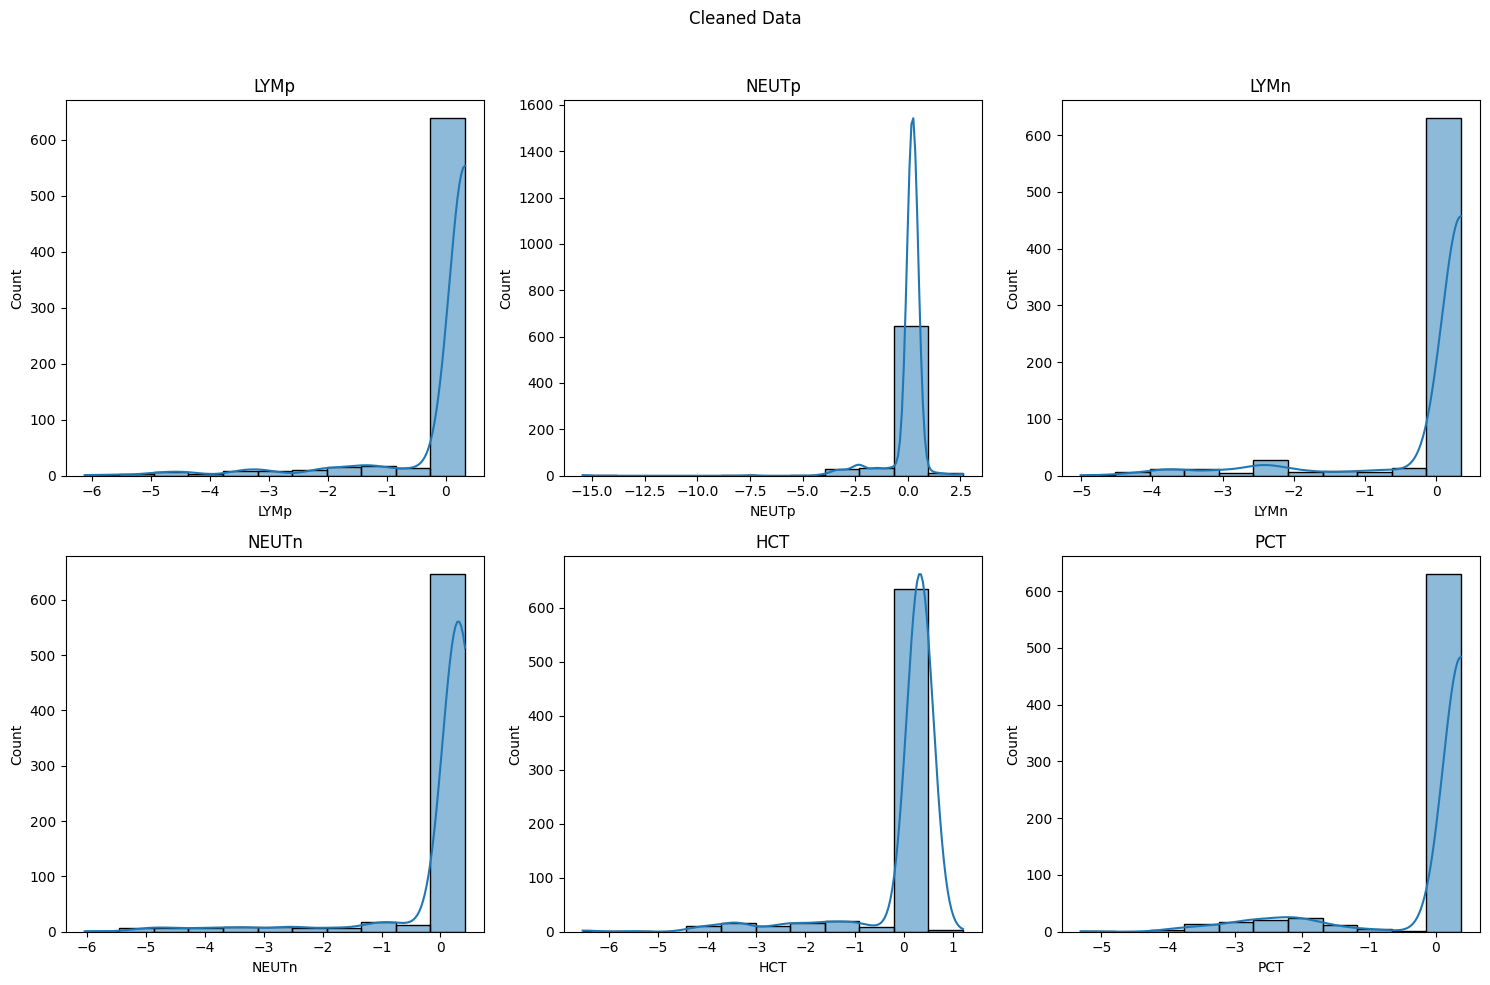

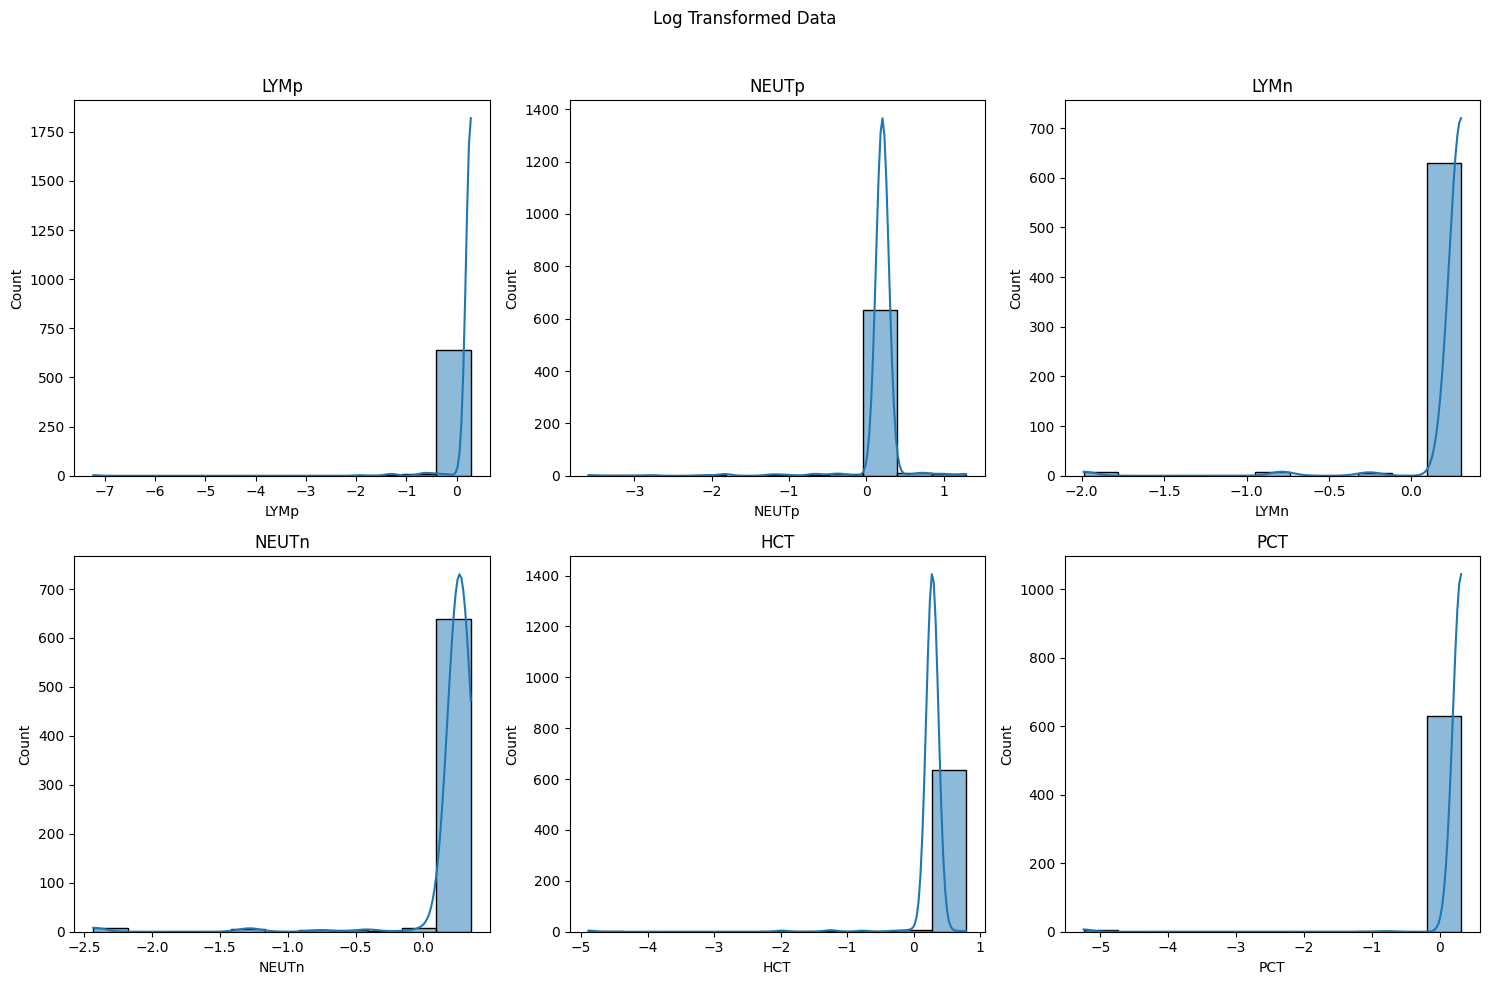

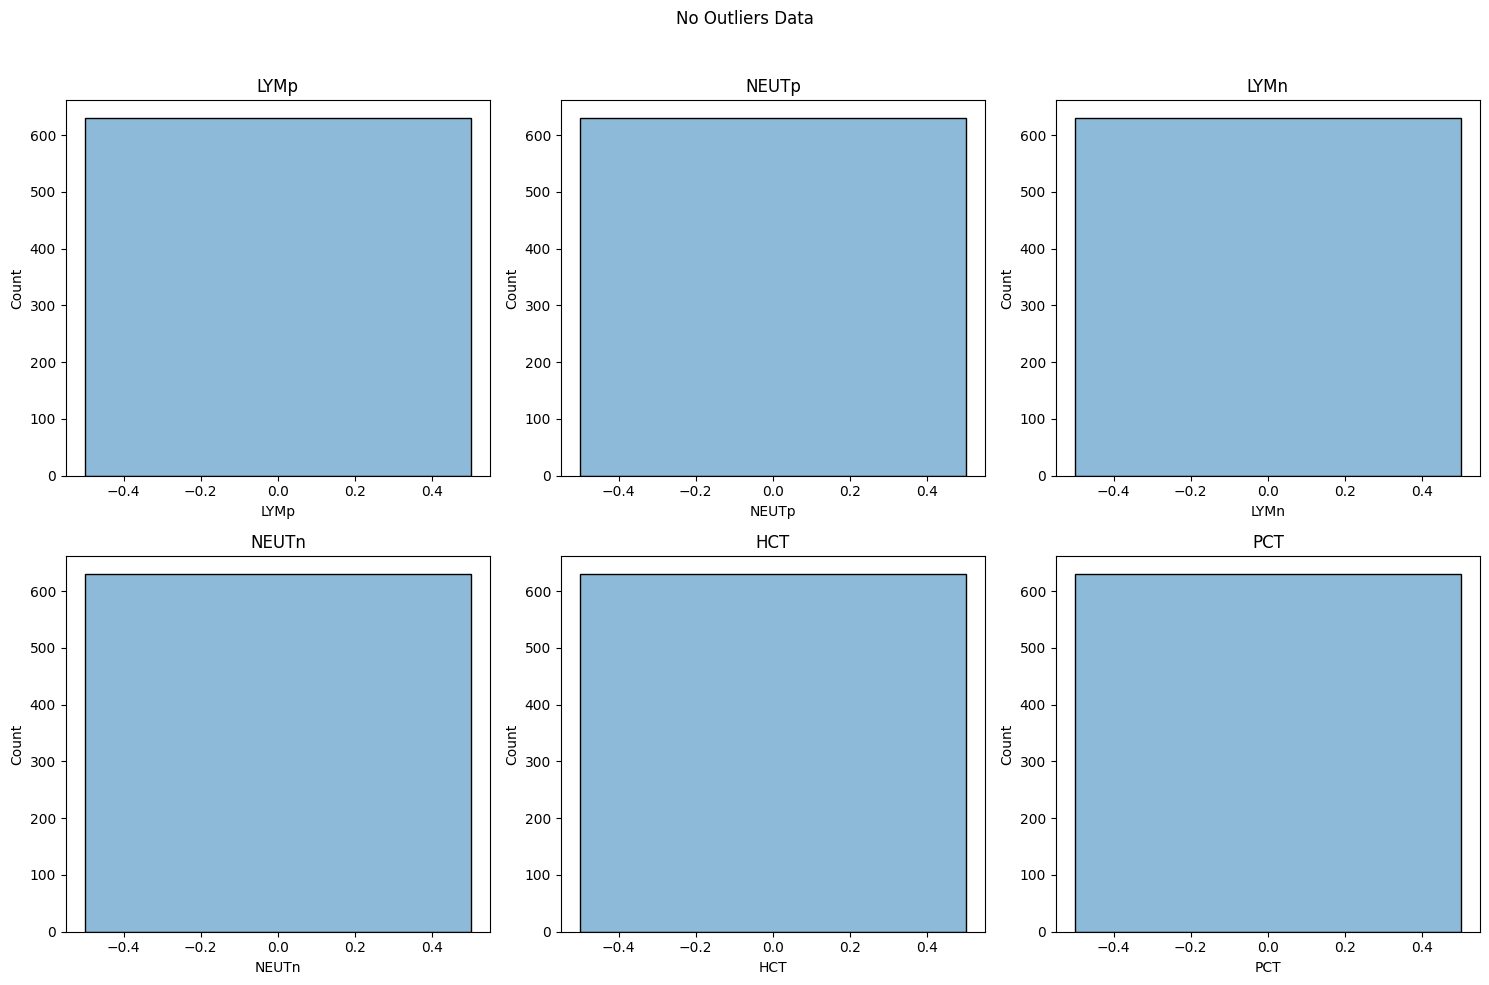

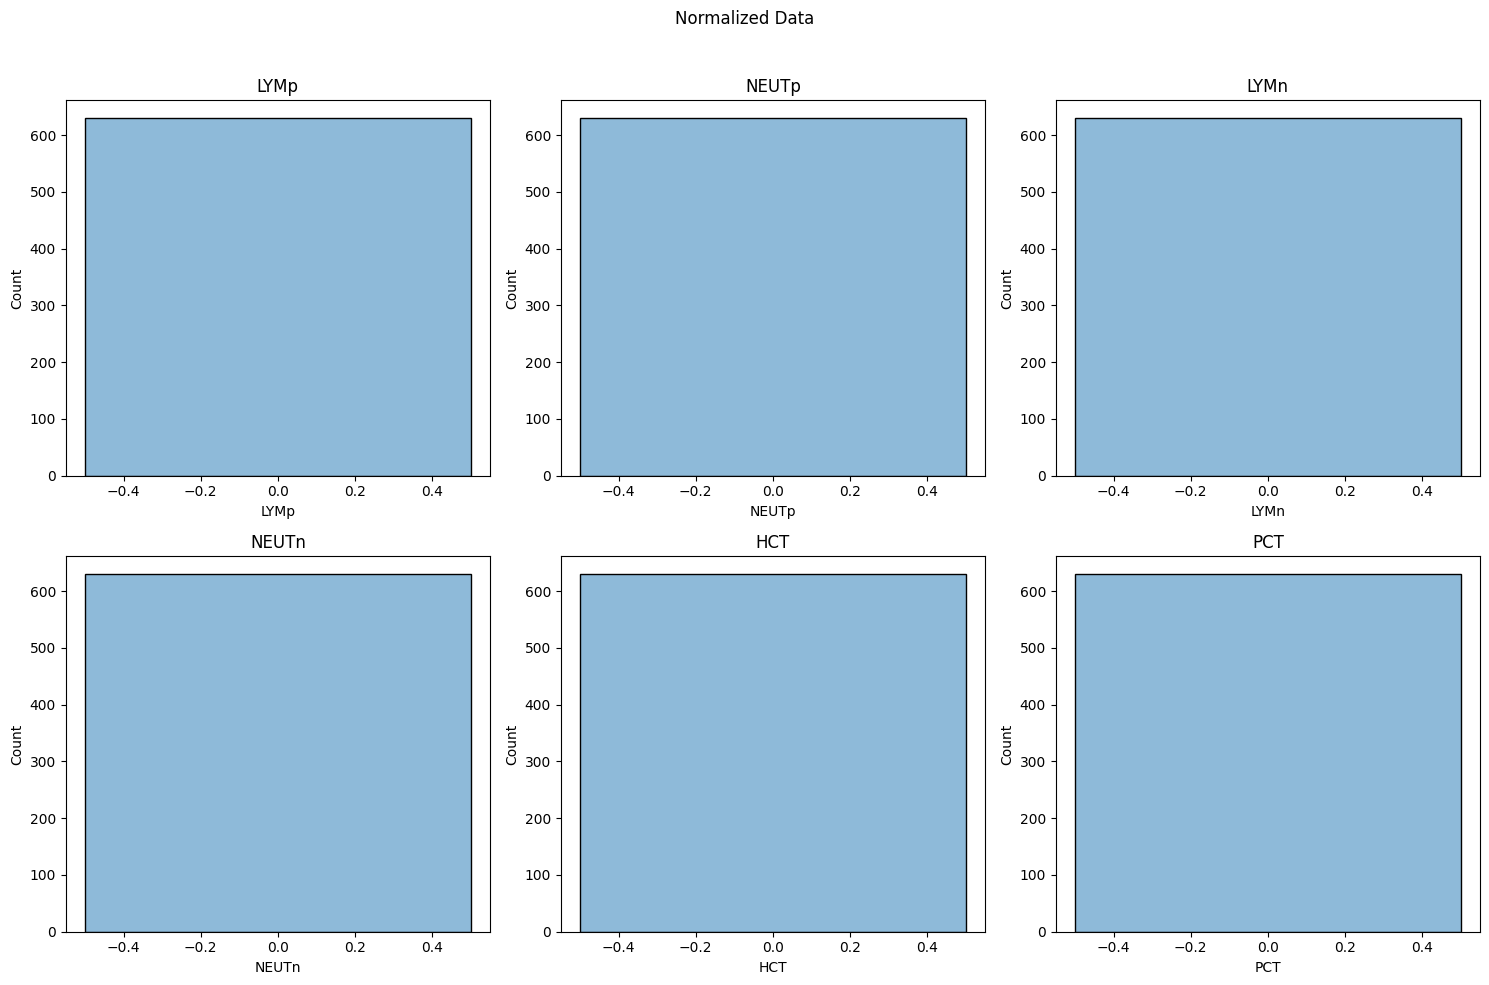

In [46]:
def log_transform_2(df, columns):
    df_log_transformed = df.copy()
    for column in columns:
        df_log_transformed[column] = np.log1p(df[column])
    return df_log_transformed

# Suppression des outliers
def remove_outliers_2(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_no_outliers = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_no_outliers

# Normalisation des données
def normalize_data_2(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

problematic_columns = ['LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'HCT', 'PCT']

# Appliquer la transformation logarithmique
df_log_transformed = log_transform_2(df_cleaned, problematic_columns)
print("Transformation logarithmique appliquée")

# Suppression des outliers après transformation logarithmique
df_no_outliers = remove_outliers_2(df_log_transformed, problematic_columns)
print("Valeurs aberrantes supprimées")

# Normalisation des données
df_normalized = normalize_data_2(df_no_outliers, problematic_columns)
print("Données normalisées")

def visualize_distributions(df, columns, title):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[column], kde=True)
        plt.title(column)
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Visualiser les distributions après chaque étape
visualize_distributions(df_cleaned, problematic_columns, 'Cleaned Data')
visualize_distributions(df_log_transformed, problematic_columns, 'Log Transformed Data')
visualize_distributions(df_no_outliers, problematic_columns, 'No Outliers Data')
visualize_distributions(df_normalized, problematic_columns, 'Normalized Data')

In [39]:
# Transformation de Box-Cox
def boxcox_transform(df, columns):
    df_boxcox = df.copy()
    for column in columns:
        # Appliquer la transformation Box-Cox
        df_boxcox[column], _ = stats.boxcox(df[column] + 1)  # Ajout de 1 pour éviter les valeurs nulles
    return df_boxcox

# Transformation de Yeo-Johnson
def yeojohnson_transform(df, columns):
    pt = PowerTransformer(method='yeo-johnson')
    df_yeojohnson = df.copy()
    df_yeojohnson[columns] = pt.fit_transform(df[columns])
    return df_yeojohnson

# on fera ces transformation plus tard mais clairement on peut voir que la transformation logarithmique ne sert à rien on va juste drop les colonnes pour l'instant.

## Selection des colonnes

In [10]:
selected_columns = ['WBC', 'RBC', 'HGB', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'Diagnosis']
df_selected = df[selected_columns]

df_no_outliers = remove_outliers(df_selected)

#print nombre d'individus après suppression des valeurs aberrantes
print("Nombre d'individus après suppression des valeurs aberrantes : ", df_no_outliers.shape[0])

Nombre d'individus après suppression des valeurs aberrantes :  1034


## Analyse de la colonne diagnosis

In [58]:
label_counts = df_cleaned['Diagnosis'].value_counts()
print("Répartition des étiquettes :\n", label_counts)

# Définir un seuil pour les étiquettes peu représentées
threshold = 10
labels_to_keep = label_counts[label_counts > threshold].index

#affichage des labels à supprimer
labels_to_remove = label_counts[label_counts <= threshold].index
print("Etiquettes à supprimer : ", labels_to_remove)

# Filtrer le dataset pour ne garder que les étiquettes avec un nombre suffisant d'individus
df_filtered = df_cleaned[df_cleaned['Diagnosis'].isin(labels_to_keep)]
print("Nombre d'individus après suppression des étiquettes peu représentées : ", df_filtered.shape[0])

Répartition des étiquettes :
 Diagnosis
Healthy                           298
Normocytic hypochromic anemia     225
Normocytic normochromic anemia    221
Iron deficiency anemia            156
Thrombocytopenia                   58
Other microcytic anemia            42
Leukemia                           18
Leukemia with thrombocytopenia      8
Macrocytic anemia                   8
Name: count, dtype: int64
Etiquettes à supprimer :  Index(['Leukemia with thrombocytopenia', 'Macrocytic anemia'], dtype='object', name='Diagnosis')
Nombre d'individus après suppression des étiquettes peu représentées :  1018


### les 2 etiquettes à supprimer sont 'Leukemia with thrombocytopenia', 'Macrocytic anemia' qui sont peu representées.